## Desafio 1

Pesquise no repositório de classificadores pré-treinados de Haar, um classificador de sorriso e exiba em tela a área referente ao retângulo do sorriso detectado.

Por se tratar de um componente de face, avalie combinar mais que um classificador.

![](imagens/smile-woman.jpg)

## 1. Requerimentos

Todas as bibliotecas já estão instaladas no Google Colab.

* OpenCV >= 3.4.3
* Matplotlib >= 3.1.3
* Seaborn >= 0.0.10
* Numpy >= 1.18.1

### 1.2 Arquivos

Baixe o repositório do GitHub utilizando o comando abaixo. Em caso de atualização, utilize o comando para apagar o diretório antes.

In [ ]:
!rm -rf fiap-ml-visao-computacional/

In [ ]:
!git clone https://github.com/michelpf/fiap-ml-visao-computacional

Vamos agora posicionar o diretório do repositório para a aula respectiva. Nesse caso envie o comando de mudança de diretório.

In [ ]:
%cd fiap-ml-visao-computacional/aula-4-classificacao-objetos-analise-facial/desafio-1/

Importação de bibliotecas.

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

## 2. Solução

Construir uma função que receba uma imagem, analise se exista um rosto humano e identifique um sorriso. O tamanho identificado do sorriso pode identificar alguma intensidade.

Retorne a imagem com o tamanho do sorrido incluído na imagem de entrada, bem como com o retângulo delimitador nele.

In [8]:
face_classifier = cv2.CascadeClassifier('../classificadores/haarcascade_frontalface_default.xml')
smile_classifier = cv2.CascadeClassifier('../classificadores/haarcascade_smile.xml')
    
def identificar_sorriso(imagem):
    
    gray = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.5, 5)

    if faces is ():
         cv2.putText(imagem, "rosto ausente", (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,0), 2)

    for (x,y,w,h) in faces:
        
        cv2.rectangle(imagem, (x,y), (x+w, y+h), (255,255,0), 1)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = imagem[y:y+h, x:x+w]
        
        smile = smile_classifier.detectMultiScale(roi_gray, 1.7, 22, minSize=(25, 25))

        for (x, y, w, h) in smile:
            cv2.rectangle(roi_color, (x, y), (x+w, y+h), (255,255,0), 1)
            tamanho = int(w) * int(h)
            cv2.putText(imagem, "sorriso %s pixels"%(tamanho), (50,80), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,0), 2)
            break

    return imagem

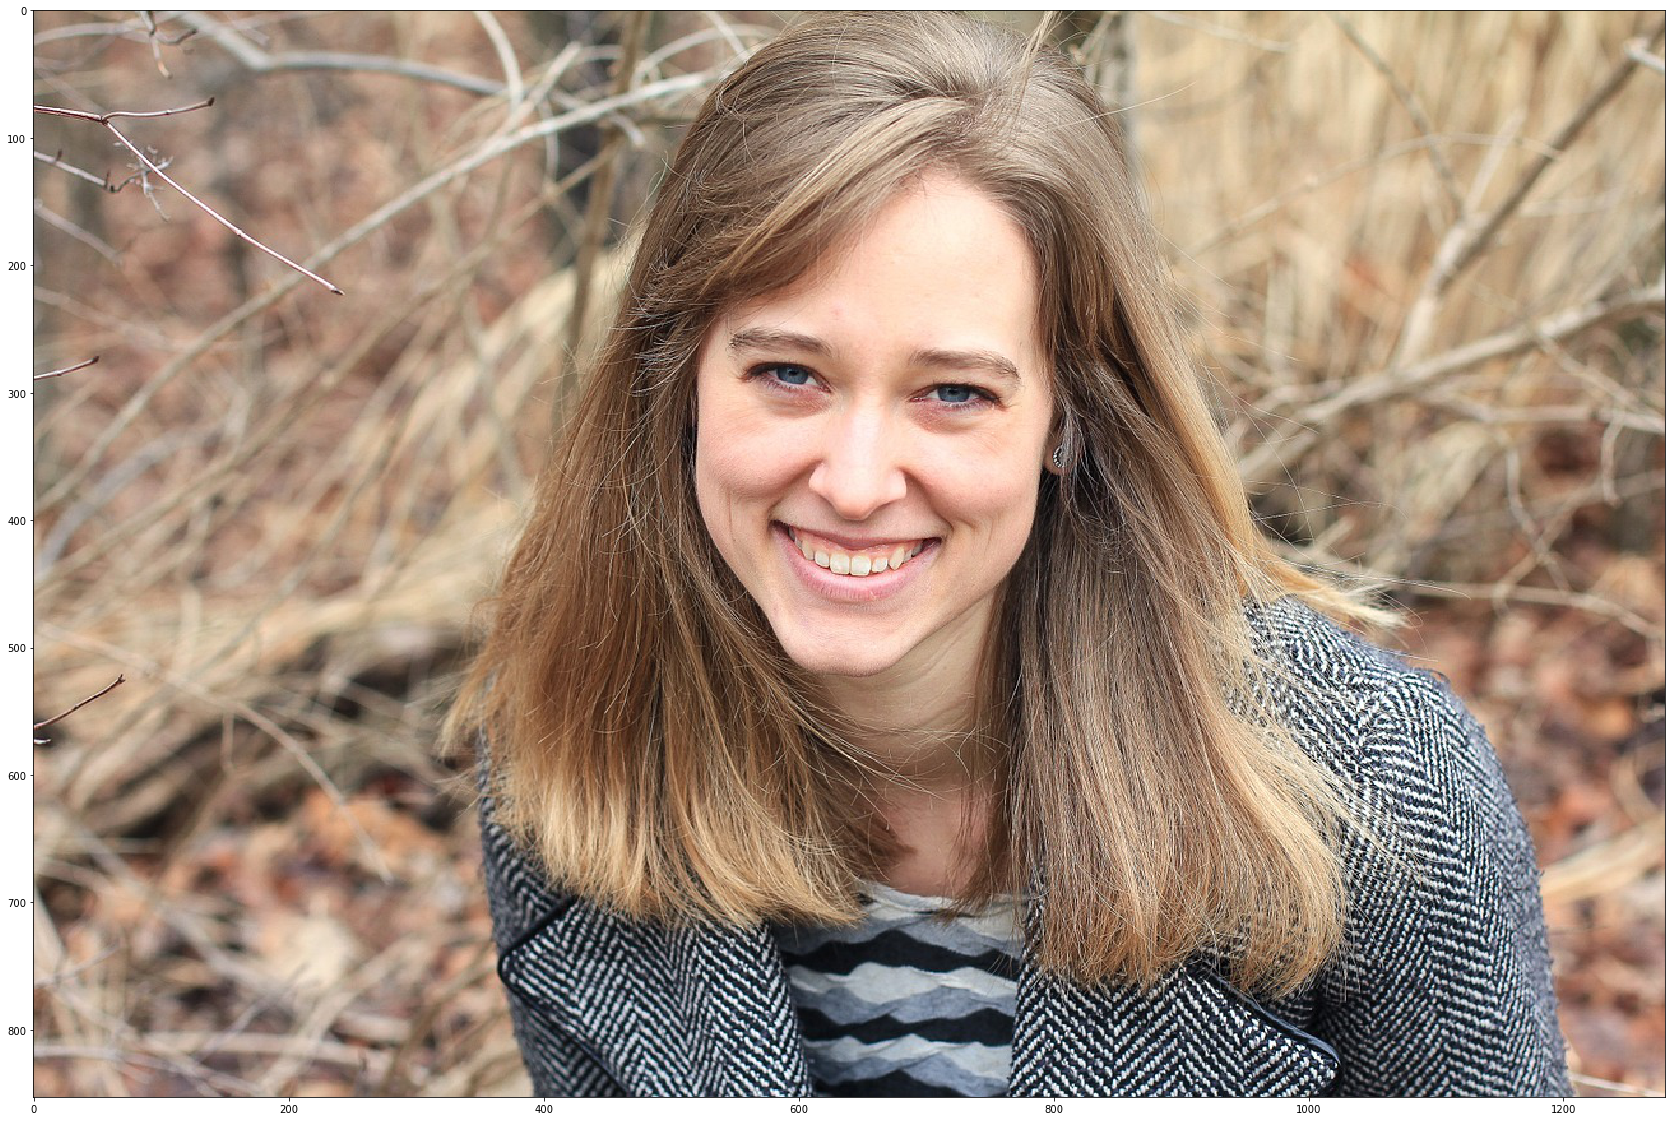

In [9]:
imagem = cv2.imread("imagens/smile-woman.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,20))
plt.imshow(imagem)

Text(0.5, 1.0, 'Sorriso')

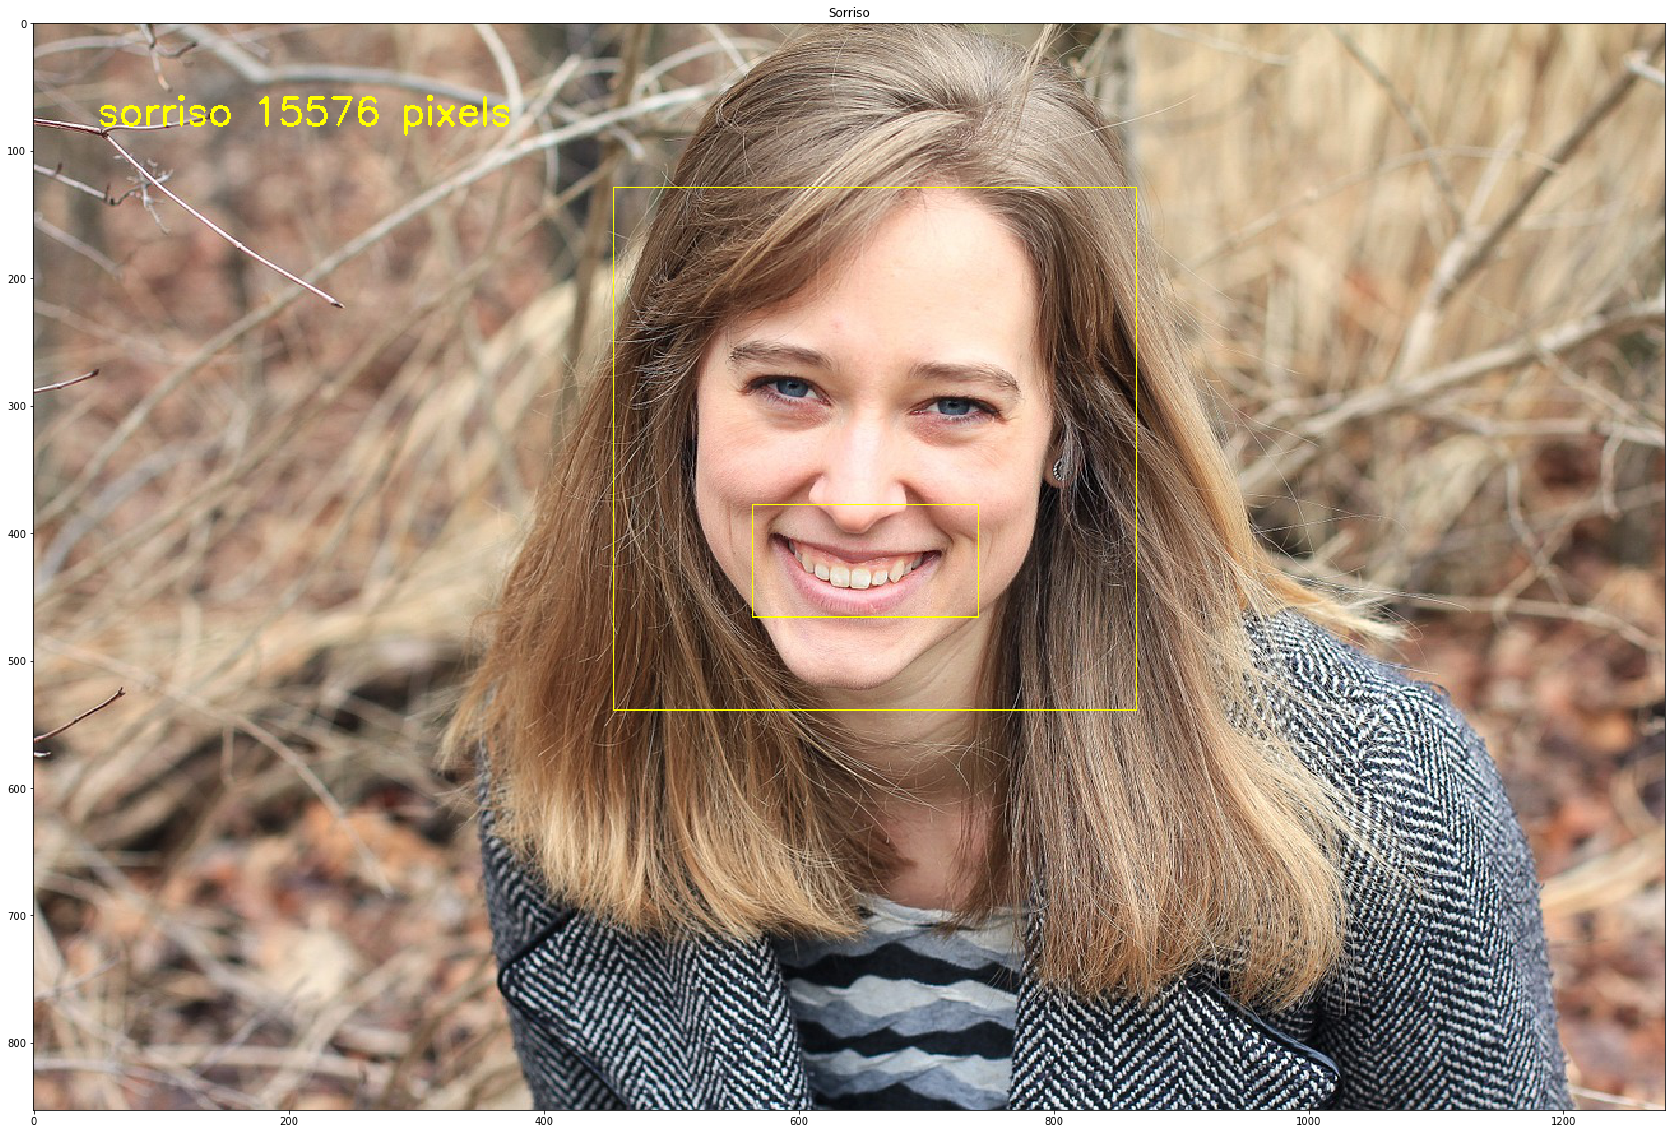

In [10]:
imagem = cv2.imread("imagens/smile-woman.jpg")
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)

imagem_proc = identificar_sorriso(imagem)

plt.figure(figsize=(30,20))
plt.imshow(imagem_proc)
plt.title("Sorriso")